In [95]:
#imported necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
#load the data
df=pd.read_csv('postings.csv')

In [105]:
#explore data set
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12894 entries, 0 to 12893
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   job_title       12894 non-null  object
 1   company         12894 non-null  object
 2   job_location    12894 non-null  object
 3   job_link        12894 non-null  object
 4   first_seen      12894 non-null  object
 5   search_city     12894 non-null  object
 6   search_country  12894 non-null  object
 7   job level       12894 non-null  object
 8   job_type        12894 non-null  object
 9   job_summary     12851 non-null  object
 10  job_skills      12705 non-null  object
dtypes: object(11)
memory usage: 1.1+ MB


,job_title,company,job_location,job_link,first_seen,search_city,search_country,job level,job_type,job_summary,job_skills
0,"Data Analyst-SQL, Tableau",Zortech Solutions,"Mountain View, CA",https://www.linkedin.com/jobs/data-analyst-jobs,2023-12-20,Bloomington,United States,Associate,Onsite,NaN,NaN
1,Market Research & Insights Analyst,Indiana University Foundation,"Bloomington, IN",https://www.linkedin.com/jobs/view/market-rese...,2023-12-20,Bloomington,United States,Mid senior,Onsite,Company Description\nAre you a high-performer ...,"Data analysis, Market research, Survey develop..."
2,Business Systems Analyst `1,Cook Medical,"Bloomington, IN",https://www.linkedin.com/jobs/view/business-sy...,2023-12-20,Bloomington,United States,Mid senior,Onsite,Overview\nThe Business Systems Analyst 1 perfo...,"Business Analysis, Technical Writing, Software..."
3,Senior VAT and Indirect Tax Analyst,Epic,"Bloomington, IN",https://www.linkedin.com/jobs/view/senior-vat-...,2023-12-20,Bloomington,United States,Mid senior,Onsite,We're looking for an experienced tax professio...,"Accounting, Finance, VAT/GST tax regimes, US a..."
4,Senior HRIS Analyst (Timekeeping and Payroll),Nordson Corporation,Greater Bloomington Area,https://www.linkedin.com/jobs/view/senior-hris...,2023-12-20,Bloomington,United States,Mid senior,Remote,Collaboration drives Nordson’s success as a ma...,"Workday HCM, UKG Dimensions, Ceridian Dayforce..."


In [13]:
#data cleaning :handling missing data and removing irrelevant columns
df=df.dropna(subset=['job_summary','job_skills'])
df=df.drop(['job_link','first_seen'],axis=1)
df.head()


,job_title,company,job_location,search_city,search_country,job level,job_type,job_summary,job_skills
1,Market Research & Insights Analyst,Indiana University Foundation,"Bloomington, IN",Bloomington,United States,Mid senior,Onsite,Company Description\nAre you a high-performer ...,"Data analysis, Market research, Survey develop..."
2,Business Systems Analyst `1,Cook Medical,"Bloomington, IN",Bloomington,United States,Mid senior,Onsite,Overview\nThe Business Systems Analyst 1 perfo...,"Business Analysis, Technical Writing, Software..."
3,Senior VAT and Indirect Tax Analyst,Epic,"Bloomington, IN",Bloomington,United States,Mid senior,Onsite,We're looking for an experienced tax professio...,"Accounting, Finance, VAT/GST tax regimes, US a..."
4,Senior HRIS Analyst (Timekeeping and Payroll),Nordson Corporation,Greater Bloomington Area,Bloomington,United States,Mid senior,Remote,Collaboration drives Nordson’s success as a ma...,"Workday HCM, UKG Dimensions, Ceridian Dayforce..."
5,Business Intelligence Reporting Analyst 2,Cook Medical,"Bloomington, IN",Bloomington,United States,Mid senior,Hybrid,Overview\nThe Business Intelligence Analyst 2 ...,"SAP Business Objects, SQL, Qlik, Data Modeling..."


In [107]:
#text analysis + cleaning 
job_skills_series= df['job_skills'].str.lower().str.split(',').explode().str.strip()
#further data cleaning 
job_skills_series=job_skills_series.replace({'microsoft excel':'excel','communication skills':'communication','visualization':'data visaulization','dashboards':'data visaulization','problemsolving':'problem solving','collaboration':'teamwork','powerbi':'power bi','tableau software':'tableau',})
job_skills_count=job_skills_series.value_counts()
print(job_skills_count.head(30))

job_skills
data analysis             4690
sql                       4289
communication             3688
excel                     3079
project management        2531
data visualization        2327
problem solving           2278
power bi                  2201
tableau                   2168
python                    2144
teamwork                  1806
business analysis         1623
reporting                 1394
business intelligence     1246
r                         1218
data analytics            1164
analytical skills         1153
data management           1011
data mining                952
agile                      951
microsoft office suite     918
data modeling              846
accounting                 836
powerpoint                 831
attention to detail        782
financial analysis         767
finance                    760
statistics                 720
machine learning           720
microsoft office           706
Name: count, dtype: int64


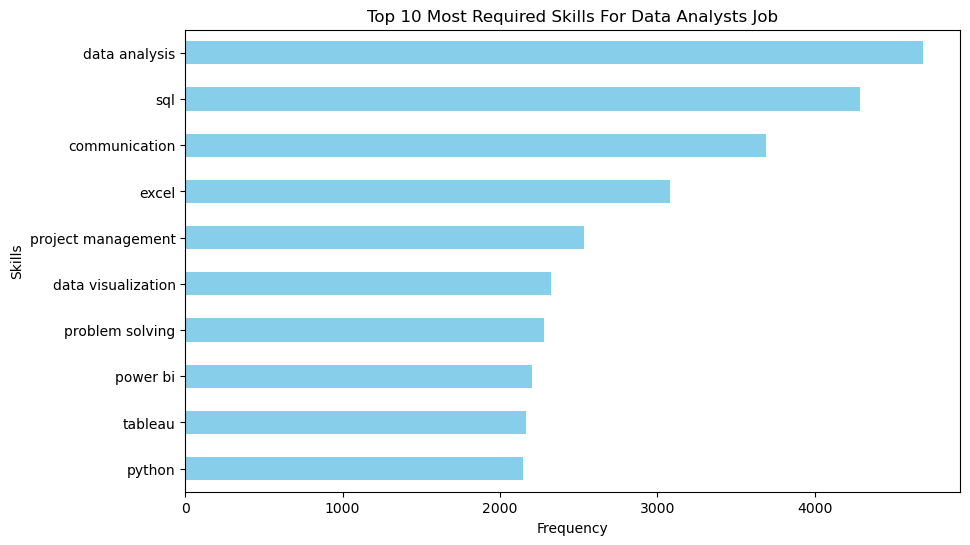

In [111]:
#plot (1)
job_skills_count.head(10).plot(kind='barh',figsize=(10,6),color='skyblue')
plt.title('Top 10 Most Required Skills For Data Analysts Job')
plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.gca().invert_yaxis()
plt.show()

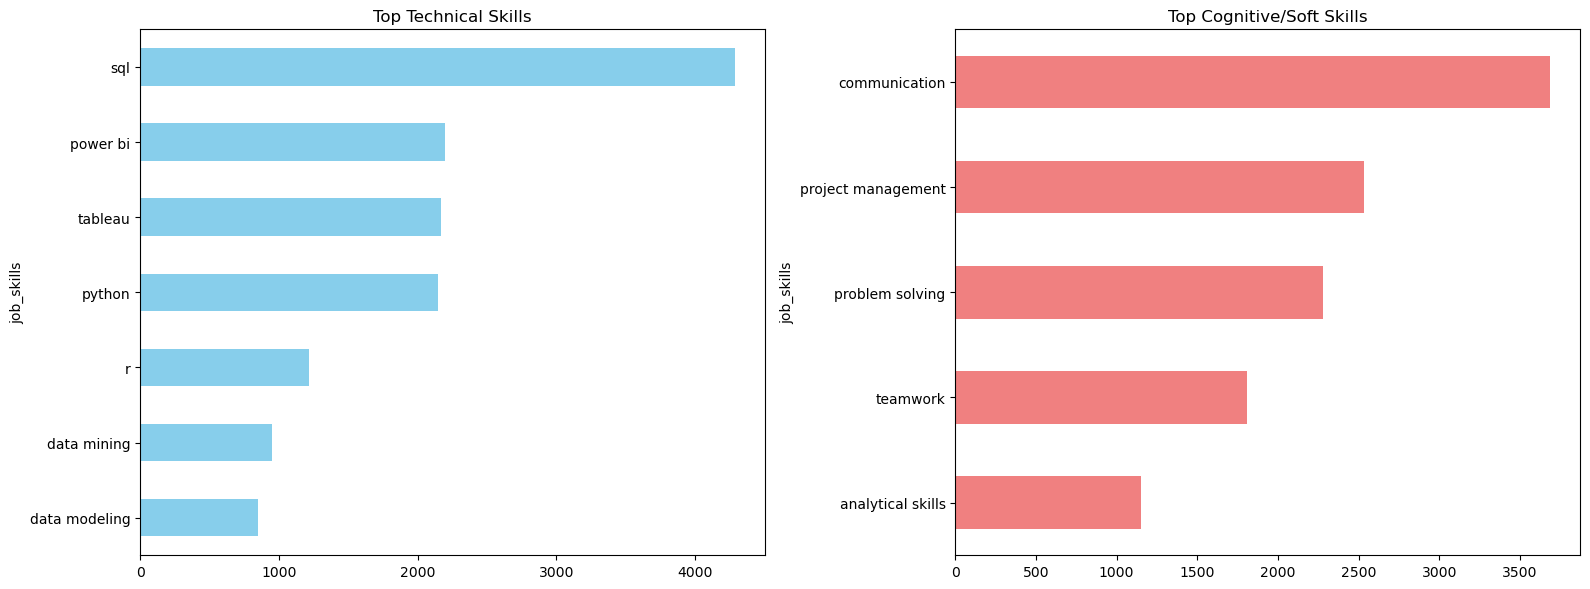

In [109]:
#split skills into two groups:
tech_keyword = ['python','power bi','tableau','data modeling','sql','r','data mining']
soft_keyword = ['communication','teamwork','analytical skills','problem solving','project management','collaboration']
tech_skills = job_skills_series[job_skills_series.isin(tech_keyword)]
soft_skills = job_skills_series[job_skills_series.isin(soft_keyword)]
tech_count=tech_skills.value_counts()
soft_count=soft_skills.value_counts()

#plot (2)
fig,axs=plt.subplots(1,2,figsize=(16,6))
tech_count.plot(kind='barh',ax=axs[0],color='skyblue')
axs[0].set_title('Top Technical Skills')
axs[0].invert_yaxis()
soft_count.plot(kind='barh',ax=axs[1],color='lightcoral')
axs[1].set_title('Top Cognitive/Soft Skills')
axs[1].invert_yaxis()
plt.tight_layout()
plt.show()